# Práctica 3: Detectores centelladores con fotomultiplicadores

In [1]:
%pip install pandas matplotlib numpy scikit-learn scipy -q --root-user-action=ignore


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')

## Importando archivos de datos

In [3]:
bgo_cs_df = pd.read_csv('./data/BGO-137CsE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
bgo_co_df = pd.read_csv('./data/BGO-60CoE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_cs_df = pd.read_csv('./data/CsI-137Cs-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_co_df = pd.read_csv('./data/CsI-60Co-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])

## Visualización de datos

### Fuente radioactiva de 60Co

#### Detector centellador CsI(Tl)

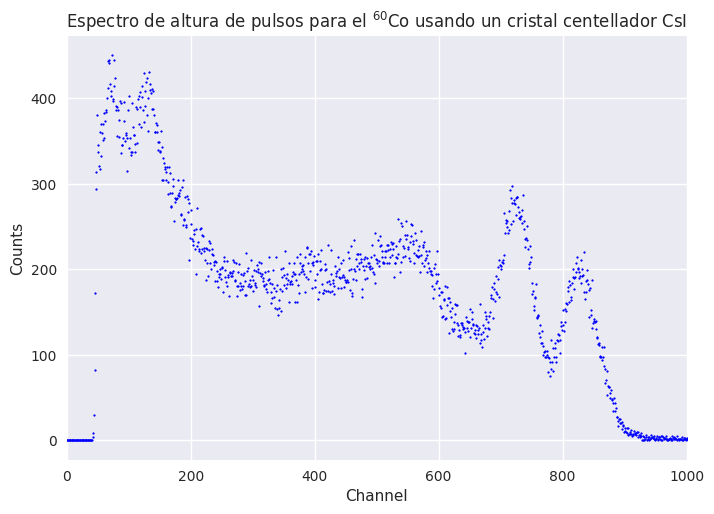

In [4]:
fig_CsI60Co, ax_CsI60Co = plt.subplots()

ax_CsI60Co.scatter(csi_co_df['Channel'], csi_co_df['Counts'], s=1.5, c='b')
ax_CsI60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_CsI60Co.set_xlabel('Channel')
ax_CsI60Co.set_ylabel('Counts')
ax_CsI60Co.set_xlim(0, 1000)
ax_CsI60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

#### Detector centellador BGO(BiGeO)

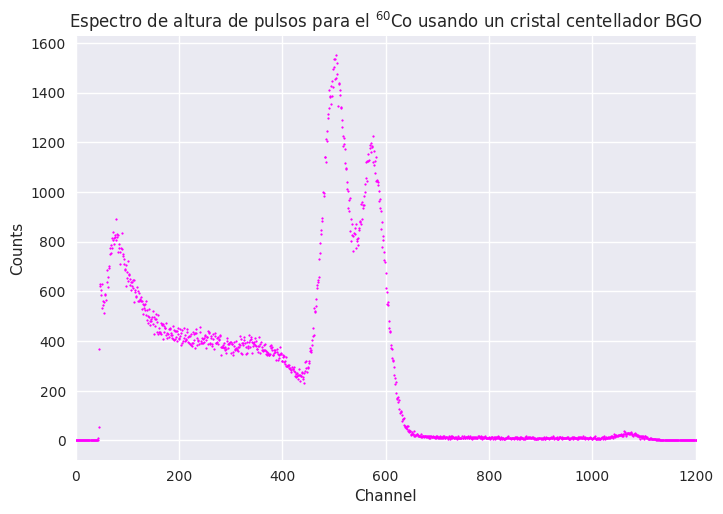

In [5]:
fig_BGO60Co, ax_BGO60Co = plt.subplots()

ax_BGO60Co.scatter(bgo_co_df['Channel'], bgo_co_df['Counts'], s=1.5, c='magenta')
ax_BGO60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_BGO60Co.set_xlabel('Channel')
ax_BGO60Co.set_ylabel('Counts')
ax_BGO60Co.set_xlim(0, 1200)
ax_BGO60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

### Fuente radioactiva de 137Cs

#### Detector centellador CsI(Tl)

(0.0, 850.0)

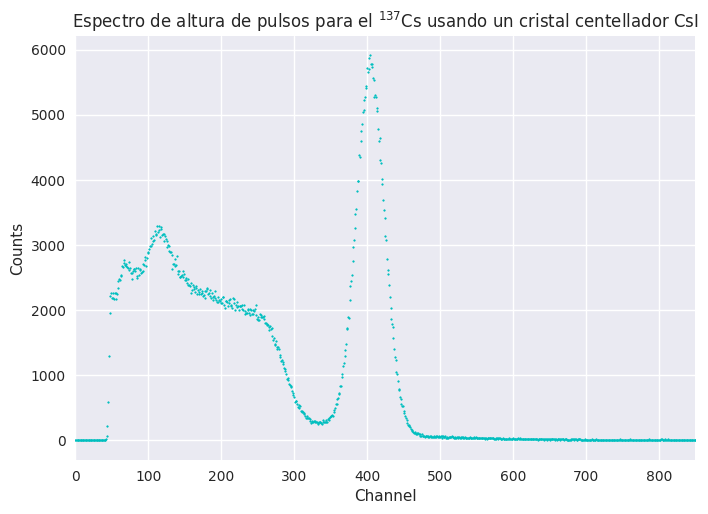

In [6]:
fig_CsI137Cs, ax_CsI137Cs = plt.subplots()

ax_CsI137Cs.scatter(csi_cs_df['Channel'], csi_cs_df['Counts'], s= 1.5, c='c')
ax_CsI137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_CsI137Cs.set_xlabel('Channel')
ax_CsI137Cs.set_ylabel('Counts')
ax_CsI137Cs.set_xlim(0, 850)

#### Detector centellador BGO(BiGeO)

(0.0, 650.0)

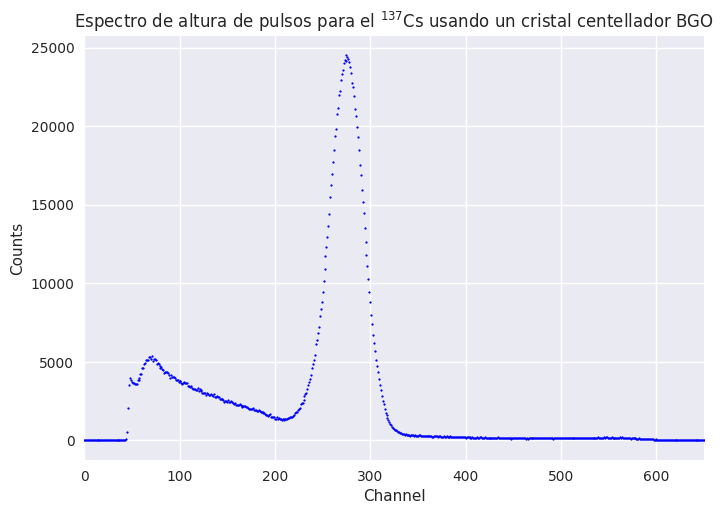

In [7]:
fig_BGO137Cs, ax_BGO137Cs = plt.subplots()

# BGO (BiGeO) with 137Cs radioactive source
ax_BGO137Cs.scatter(bgo_cs_df['Channel'], bgo_cs_df['Counts'], s= 1.5, c='b')
ax_BGO137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_BGO137Cs.set_xlabel('Channel')
ax_BGO137Cs.set_ylabel('Counts')
ax_BGO137Cs.set_xlim(0, 650)

## Análisis de datos

### Calibración de energía del detector centellador CsI(Tl)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|  137Cs  |   404   |  5910  |    661.657   |
|   60Cs  |   725   |   283  |   1173.228   |
|   60Cs  |   825   |   202  |   1332.492   |

In [8]:
csi_df = pd.DataFrame({'Channel': [404, 725, 825], 'Energy': [661.57, 1173.228, 1332.492]})
csi_df

,Channel,Energy
0,404,661.570
1,725,1173.228
2,825,1332.492


In [9]:
regr_csi = linear_model.LinearRegression()

In [10]:
regr_csi.fit(csi_df[['Channel']], csi_df['Energy'])

LinearRegression()

In [11]:
energy_pred_csi = regr_csi.predict(csi_df[['Channel']])

In [12]:
slope_csi = regr_csi.coef_[0]
intercept_csi = regr_csi.intercept_

print(f"Slope: {slope_csi:.4f}")
print(f"Intercept: {intercept_csi:.4f}")

Slope: 1.5937
Intercept: 17.7236


In [13]:
r2_csi = r2_score(csi_df['Energy'], energy_pred_csi)

print(fr"$r^2$ = {r2_csi}")

$r^2$ = 0.9999999752077676


In [14]:
line = lambda x, m, b : m * x + b

In [15]:
params_csi, covm_csi = curve_fit(line, csi_df['Channel'], csi_df['Energy'], p0=[1, 1])

In [16]:
err_csi = np.sqrt(np.diag(covm_csi))

print(fr"Slope: {params_csi[0]:.4f} $\pm$ {err_csi[0]:.5f}")
print(f"Intercept: {params_csi[1]:.4f} +- {err_csi[1]:.4f}")

Slope: 1.5937 $\pm$ 0.00025
Intercept: 17.7236 +- 0.1695


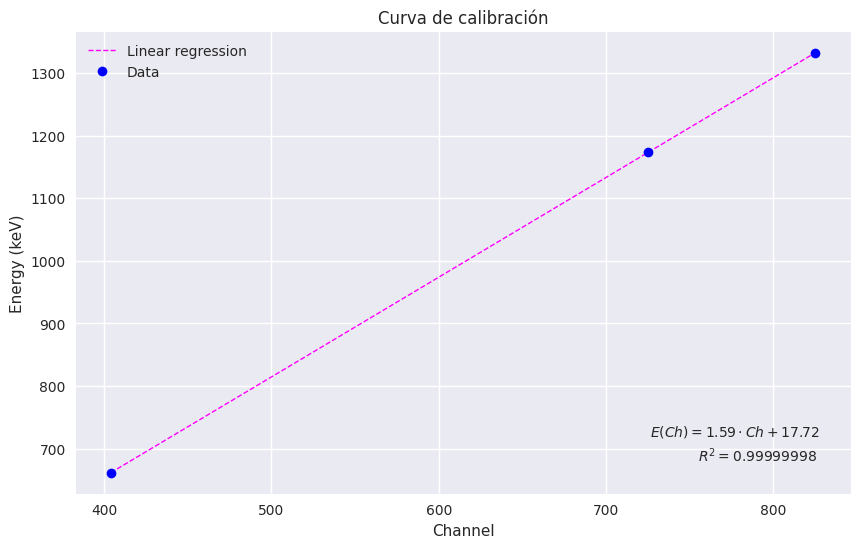

In [17]:
ChannelCsI = csi_df['Channel']
EnergyCsI = csi_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCsI, energy_pred_csi, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCsI, EnergyCsI, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_csi:.2f} \cdot Ch + {intercept_csi:.2f}$',
    xy=(726, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_csi:.8f}$',
    xy=(755, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

### Calibración de energía del detector centellador BGO(BiGeO)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|   60Co  |   502   |  1457  |   1173.228   |
|   60Co  |   572   |  1160  |   1332.492   |
|  137Cs  |   272   |  24167 |    661.657   |

In [18]:
bgo_df = pd.DataFrame({'Channel': [502, 572, 272], 'Energy': [1173.228, 1332.492, 661.657]})
bgo_df

,Channel,Energy
0,502,1173.228
1,572,1332.492
2,272,661.657


In [19]:
regr_bgo = linear_model.LinearRegression()

In [20]:
regr_bgo.fit(bgo_df[['Channel']], bgo_df['Energy'])

LinearRegression()

In [21]:
energy_pred_bgo = regr_bgo.predict(bgo_df[['Channel']])

In [22]:
slope_bgo = regr_bgo.coef_[0]
intercept_bgo = regr_bgo.intercept_

print(f"Slope: {slope_bgo:.4f}")
print(f"Intercept: {intercept_bgo:.4f}")

Slope: 2.2332
Intercept: 53.8501


In [23]:
r2_bgo = r2_score(bgo_df['Energy'], energy_pred_bgo)

print(fr"$r^2$ = {r2_bgo}")

$r^2$ = 0.9999814498094657


In [24]:
params_bgo, covm_bgo = curve_fit(line, bgo_df['Channel'], bgo_df['Energy'], p0=[1, 1])

In [25]:
err_bgo = np.sqrt(np.diag(covm_bgo))

print(fr"Slope: {params_bgo[0]:.4f} $\pm$ {err_bgo[0]:.5f}")
print(f"Intercept: {params_bgo[1]:.4f} +- {err_bgo[1]:.4f}")

Slope: 2.2332 $\pm$ 0.00962
Intercept: 53.8501 +- 4.4880


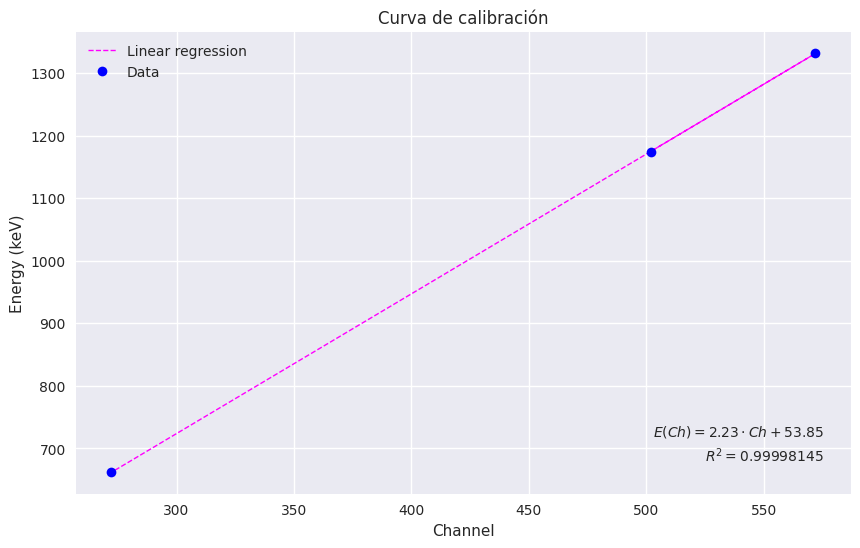

In [26]:
ChannelCal = bgo_df['Channel']
EnergyCal = bgo_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCal, energy_pred_bgo, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCal, EnergyCal, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_bgo:.2f} \cdot Ch + {intercept_bgo:.2f}$',
    xy=(503, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_bgo:.8f}$',
    xy=(525, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

## Espectros de energía

### Detector centellador CsI(Tl)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

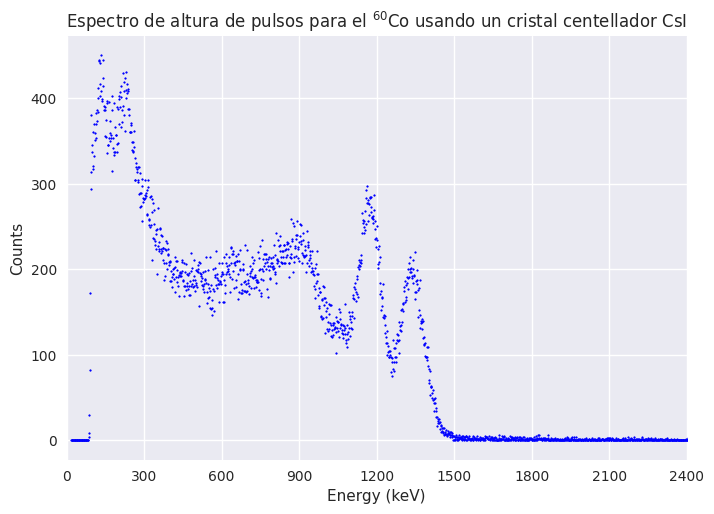

In [37]:
csi_co_df['Energy'] = line(csi_co_df['Channel'], slope_csi, intercept_csi)
EnergyCsICo = csi_co_df['Energy']
CountsCsICo = csi_co_df['Counts']

fig_energy_CsICo, ax_energy_CsICo = plt.subplots()
# ax_energy_CsICo.plot(EnergyCsICo, CountsCsICo, 'b', mfc='k', lw=1)
ax_energy_CsICo.scatter(EnergyCsICo, CountsCsICo, s= 1.5, c='b')
ax_energy_CsICo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_energy_CsICo.set_xlabel('Energy (keV)')
ax_energy_CsICo.set_ylabel('Counts')
ax_energy_CsICo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1500.0)

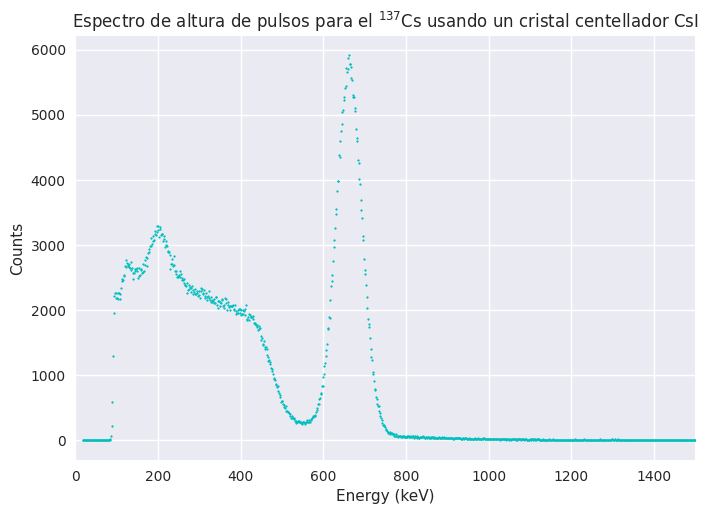

In [46]:
csi_cs_df['Energy'] = line(csi_cs_df['Channel'], slope_csi, intercept_csi)
EnergyCsICs = csi_cs_df['Energy']
CountsCsICs = csi_cs_df['Counts']

fig_energy_CsICs, ax_energy_CsICs = plt.subplots()
# ax_energy_CsICs.plot(EnergyCsICs, CountsCsICs, 'b', mfc='k', lw=1)
ax_energy_CsICs.scatter(EnergyCsICs, CountsCsICs, s= 1.5, c='c')
ax_energy_CsICs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_energy_CsICs.set_xlabel('Energy (keV)')
ax_energy_CsICs.set_ylabel('Counts')
# ax_energy_CsICs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICs.set_xlim(0, 1500)

### Detector centellador BGO (BiGeO)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

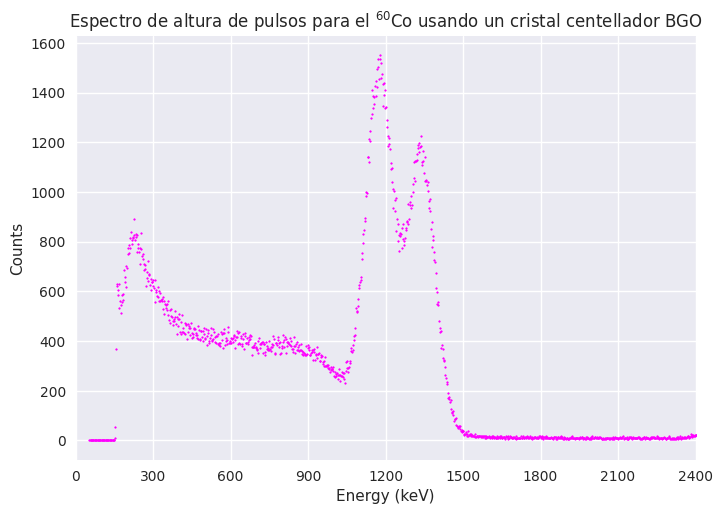

In [45]:
bgo_co_df['Energy'] = line(bgo_co_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCo = bgo_co_df['Energy']
CountsBGOCo = bgo_co_df['Counts']

fig_energy_BGOCo, ax_energy_BGOCo = plt.subplots()
# ax_energy_BGOCo.plot(EnergyBGOCo, CountsBGOCo, 'b', mfc='k', lw=1)
ax_energy_BGOCo.scatter(EnergyBGOCo, CountsBGOCo, s= 1.5, c='magenta')
ax_energy_BGOCo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_energy_BGOCo.set_xlabel('Energy (keV)')
ax_energy_BGOCo.set_ylabel('Counts')
ax_energy_BGOCo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1600.0)

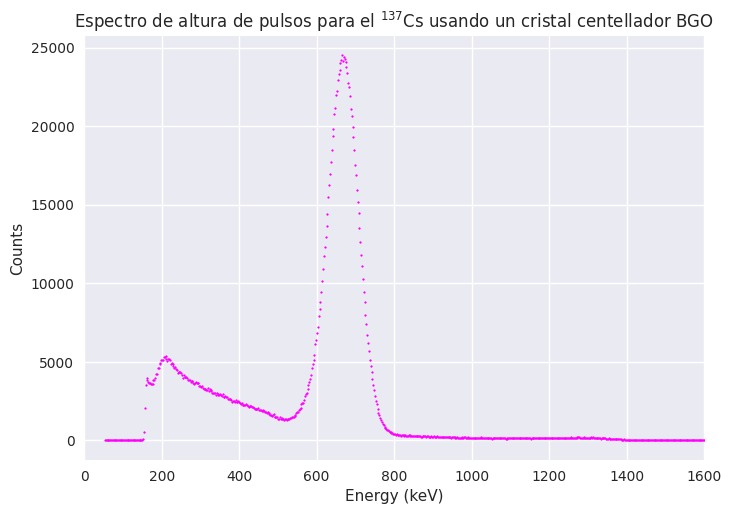

In [51]:
bgo_cs_df['Energy'] = line(bgo_cs_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCs = bgo_cs_df['Energy']
CountsBGOCs = bgo_cs_df['Counts']

fig_energy_BGOCs, ax_energy_BGOCs = plt.subplots()
# ax_energy_BGOCs.plot(EnergyBGOCs, CountsBGOCs, 'b', mfc='k', lw=1)
ax_energy_BGOCs.scatter(EnergyBGOCs, CountsBGOCs, s= 1.5, c='magenta')
ax_energy_BGOCs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_energy_BGOCs.set_xlabel('Energy (keV)')
ax_energy_BGOCs.set_ylabel('Counts')
# ax_energy_BGOCs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCs.set_xlim(0, 1600)